# This notebook shows Statstical Analysis Done by Isabelle. I created visualizations off of this data

## Statistical Analysis 

## What variables are statistically significant?

In [10]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [11]:
# load SQL 
import sqlite3
conn = sqlite3.connect("im.db")

In [12]:
top_movies_by_votes = pd.read_sql("""SELECT genres, primary_title, averagerating, start_year, numvotes
                                FROM movie_basics
                                JOIN movie_ratings
                                    USING(movie_id)
                                ORDER BY numvotes DESC
;""", conn)

In [13]:
# Load in budgets data
budgets = pd.read_csv('tn.movie_budgets.csv')
budgets.head()

FileNotFoundError: [Errno 2] No such file or directory: 'tn.movie_budgets.csv'

In [ ]:
budgets.info()

In [ ]:
# to change release date into a date type
budgets['release_date'] = pd.to_datetime(budgets['release_date'])
budgets.info()

In [ ]:
# to change dollar variables into integer types
budgets[budgets.columns[3:]] = budgets[budgets.columns[3:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)

In [ ]:
# integer conversion successful
budgets.info()

In [ ]:
# load in and clean bom movie data
bom = pd.read_csv('bom.movie_gross.csv.gz')
bom = bom.dropna(how='any',axis=0) 
bom['foreign_gross'].astype('str')
bom['foreign_gross']=bom['foreign_gross'].str.replace(',','')
bom['foreign_gross'] = bom['foreign_gross'].astype(float)

In [ ]:
bom_budgets1 = pd.merge(budgets, bom, how='left',
                  left_on='movie', right_on='title')
bom_budgets1

In [ ]:
top_15000 = bom_budgets1.nlargest(5000, 'domestic_gross_x')
top_movie_titles = set(top_movies_by_votes.primary_title)

In [ ]:
same_movies = []
for movie in top_15000.title:
    if movie in top_movie_titles:
        same_movies.append(movie)

In [14]:
len(same_movies)

NameError: name 'same_movies' is not defined

In [15]:
filtered_imdb = top_movies_by_votes[top_movies_by_votes.primary_title.isin(same_movies)]
filtered_imdb

NameError: name 'same_movies' is not defined

In [16]:
# combining the genres with the financial data from budgets and bom
merged = pd.merge(left=filtered_imdb,right=top_15000, how='left',      
left_on='primary_title', right_on='movie')

NameError: name 'filtered_imdb' is not defined

In [17]:
# drop null values
merged = merged.dropna()

NameError: name 'merged' is not defined

In [18]:
# filtering for genres that contain 'action'
filtered_genres_action = merged[merged["genres"].str.contains("Action")]
filtered_genres_action

NameError: name 'merged' is not defined

In [19]:
# Understanding the domestic gross income for action movies, to be used to filter on next
filtered_genres_action['domestic_gross_x'].describe()

# data is not normally distributed and is positively skewed (median < mean)
# for this analysis, we will use the median value ($55,833,596.50) to filter movies and make this the "goal" for Computing Vision

NameError: name 'filtered_genres_action' is not defined

## Median Filter

In [20]:
# filter out movies that have made over this median threshold.
filtered_genres1 = filtered_genres_action[filtered_genres_action['domestic_gross_x'] >= 55833596.50]
filtered_genres1

NameError: name 'filtered_genres_action' is not defined

In [21]:
filtered_genres1['production_budget'].describe()

NameError: name 'filtered_genres1' is not defined

In [22]:
# Let's say that Computing Vision wants to make the median ($55,833,596.50) amount fot gross domestic income on
#     their first film.
# Computing Vision believes a modest budget of $25,000,000 will be enough to reach their goal. Is this true?

# Ho: A production budget of $25,000,000 is not enough to make the median amount of gross income. (mu <= x-bar)
# Ha: A production budget of $25,000,000 is enough to make the median amount of gross income. (mu > x-bar)

# significance is alpha = 0.05 (95% confidence)

In [23]:
# computing z-statistic using the population production budget mean and standard deviation
import scipy.stats as stats
from math import sqrt
x_bar = 25000000 # sample mean 
n = 177 # number of movies
sigma = 72569982.67 # sd of population
mu = 129334463.28 # Population mean 

z = (x_bar - mu)/(sigma/sqrt(n))
z

-19.12746430142528

In [24]:
# computing p-value
p = stats.norm.cdf(z)

In [8]:
pval = 1 - p
pval

1.0

In [9]:
# with a p-value of 1, we can confidently reject the null hypothesis and conclude that a $25,000,000 budget is not enough
#     to make domestic gross income of $55,833,596.50.

# p > a; fail to rejct the null hypothesis and conclude with 95% confidence that this budget will not help them reach the goal.

In [10]:
# What production budget will allow Computing Vision to make at least $55,833,596.50 in gross domestic income?
# Would a $50,000,000 budget allow for this to happen?

# Ho: A production budget of $50,000,000 is not enough to make the median amount of gross income. (mu <= x-bar)
# Ha: A production budget of $50,000,000 is enough to make the median amount of gross income. (mu > x-bar)

# significance is alpha = 0.05 (95% confidence)

In [11]:
x_bar1 = 50000000 # sample mean 
n1 = 177 # number of movies
sigma1 = 72569982.67 # sd of population
mu1 = 129334463.28 # Population mean 

z1 = (x_bar1 - mu1)/(sigma1/sqrt(n1))
z1

-14.544255719115007

In [12]:
# computing p-value
p1 = stats.norm.cdf(z1)

In [13]:
pval1 = 1 - p1
pval1

# p > a; fail to rejct the null hypothesis and conclude with 95% confidence that this budget will not help them reach the goal.

1.0

In [14]:
# doubling their initial modest budget does not get them to their goal; they will likely need to spend more
# try $68,000,000

# Ho: A production budget of $68,000,000 is not enough to make the median amount of gross income. (mu <= x-bar)
# Ha: A production budget of $68,000,000 is enough to make the median amount of gross income. (mu > x-bar)

# significance is alpha = 0.05 (95% confidence)

In [15]:
x_bar2 = 139000000 # sample mean 
n2 = 177 # number of movies
sigma2 = 72569982.67 # sd of population
mu2 = 129334463.28 # Population mean 

z2 = (x_bar2 - mu2)/(sigma2/sqrt(n2))
z2

1.771966833909563

In [16]:
# computing p-value
p2 = stats.norm.cdf(z2)

In [17]:
pval2 = 1 - p2
pval2

# p < a; rejct the null hypothesis and conclude with 95% confidence that this budget will help them reach the goal. 

0.03820003143450934

## Mean Filter

In [18]:
# filter out movies that have made over this median threshold.
filtered_genres2 = filtered_genres_action[filtered_genres_action['domestic_gross_x'] >= 99478358.79]
filtered_genres2

NameError: name 'filtered_genres_action' is not defined

In [19]:
filtered_genres2['production_budget'].describe()

NameError: name 'filtered_genres2' is not defined

In [20]:
# Let's say that Computing Vision wants to make the mean ($150,681,196.58) amount fot gross domestic income on
#     their first film.
# Computing Vision believes a modest budget of $25,000,000 will be enough to reach their goal. Is this true?

# Ho: A production budget of $25,000,000 is not enough to make the mean amount of gross income. (mu <= x-bar)
# Ha: A production budget of $25,000,000 is enough to make the mean amount of gross income. (mu > x-bar)

# significance is alpha = 0.05 (95% confidence)

In [21]:
# computing z-statistic using the population production budget mean and standard deviation
x_barm = 25000000 # sample mean 
nm = 117 # number of movies
sigmam = 70235544.51 # sd of population
mum = 150681196.58 # Population mean 

zm = (x_barm - mum)/(sigmam/sqrt(nm))
zm

-19.35558420422045

In [22]:
pm = stats.norm.cdf(zm)

In [23]:
pvalm = 1 - pm
pvalm

1.0

In [24]:
# with a p-value of 1, we can confidently reject the null hypothesis and conclude that a $25,000,000 budget is not enough
#     to make domestic gross income of $150,681,196.58.

# p > a; fail to rejct the null hypothesis and conclude with 95% confidence that this budget will not help them reach the goal.

In [25]:
# What production budget will allow Computing Vision to make at least $150,681,196.58 in gross domestic income?
# Would a $50,000,000 budget allow for this to happen?

# Ho: A production budget of $50,000,000 is not enough to make the median amount of gross income. (mu <= x-bar)
# Ha: A production budget of $50,000,000 is enough to make the median amount of gross income. (mu > x-bar)

# significance is alpha = 0.05 (95% confidence)

In [26]:
x_barm1 = 50000000 # sample mean 
nm1 = 117 # number of movies
sigmam1 = 70235544.51 # sd of population
mum1 = 150681196.58 # Population mean 

zm1 = (x_barm1 - mum1)/(sigmam1/sqrt(nm1))
zm1

-15.50544895509032

In [27]:
pm1 = stats.norm.cdf(zm1)

In [28]:
pvalm1 = 1 - pm1
pvalm1

# p > a; fail to rejct the null hypothesis and conclude with 95% confidence that this budget will not help them reach the goal.

1.0

In [29]:
# doubling their initial modest budget does not get them to their goal; they will likely need to spend more
# try $161,500,000

# Ho: A production budget of $161,500,000 is not enough to make the median amount of gross income. (mu <= x-bar)
# Ha: A production budget of $161,500,000 is enough to make the median amount of gross income. (mu > x-bar)

# significance is alpha = 0.05 (95% confidence)

In [30]:
x_barm2 = 161500000 # sample mean 
nm2 = 117 # number of movies
sigmam2 = 70235544.51 # sd of population
mum2 = 150681196.58 # Population mean 

zm2 = (x_barm2 - mum2)/(sigmam2/sqrt(nm2))
zm2

1.6661542560300622

In [31]:
pm2 = stats.norm.cdf(zm2)

In [32]:
pvalm2 = 1 - pm2
pvalm2

# p < a; rejct the null hypothesis and conclude with 95% confidence that this budget will help them reach the goal. 

0.0478413471867809

Text(0.5, 1.0, 'Increasing Production Budget Spending Increases Confidence about Gross Domestic Income Potential')

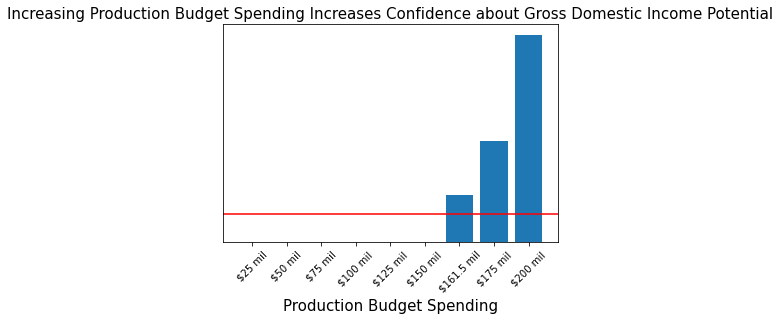

In [33]:
import matplotlib.pyplot as plt

data = {'$25 mil': 0, '$50 mil': 0, '$75 mil': 0, '$100 mil': 0, '$125 mil': 0, '$150 mil':0, '$161.5 mil': 1.7, '$175 mil': 3.7, '$200 mil':7.6}
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.axhline(y = 1.0, color = 'r', linestyle = '-')
plt.xticks(rotation = 45)
plt.yticks([])
plt.tick_params(left=False)
plt.xlabel('Production Budget Spending', fontsize=15)
plt.title('Increasing Production Budget Spending Increases Confidence about Gross Domestic Income Potential', fontsize=15)
#plt.suptitle('The more prroduction budget the more confidence gross domestic income will reach at least $150,681,196.58')

# Mathis Visualization Starts Here

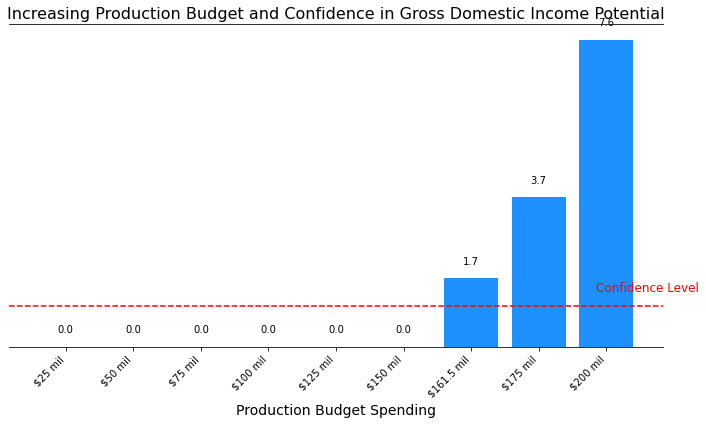

In [34]:
import matplotlib.pyplot as plt

# Data dictionary with budget spending and confidence values
data = {'$25 mil': 0, '$50 mil': 0, '$75 mil': 0, '$100 mil': 0, '$125 mil': 0, '$150 mil': 0, '$161.5 mil': 1.7, '$175 mil': 3.7, '$200 mil': 7.6}
names = list(data.keys())  # List of budget spending labels
values = list(data.values())  # List of confidence values

# Create a figure and axis with custom size
plt.figure(figsize=(10, 6))

# Create a bar plot with custom colors
bars = plt.bar(range(len(data)), values, tick_label=names, color='dodgerblue')

# Add a horizontal line at y = 1.0 with a red dashed line style
plt.axhline(y=1.0, color='r', linestyle='--')

# Customize x-axis labels and rotate for readability
plt.xticks(rotation=45, ha='right')

# Remove y-axis ticks and labels
plt.yticks([])

# Remove left and right spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Set x-axis label and title with increased font size
plt.xlabel('Production Budget Spending', fontsize=14)
plt.title('Increasing Production Budget and Confidence in Gross Domestic Income Potential', fontsize=16)

# Annotate the line with the confidence level
plt.annotate('Confidence Level', xy=(len(data) - 1, 1), xytext=(-10, 15), textcoords='offset points', color='r', fontsize=12)

# Annotate the bars with confidence values
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.3, f'{value:.1f}', ha='center', va='bottom', color='black', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

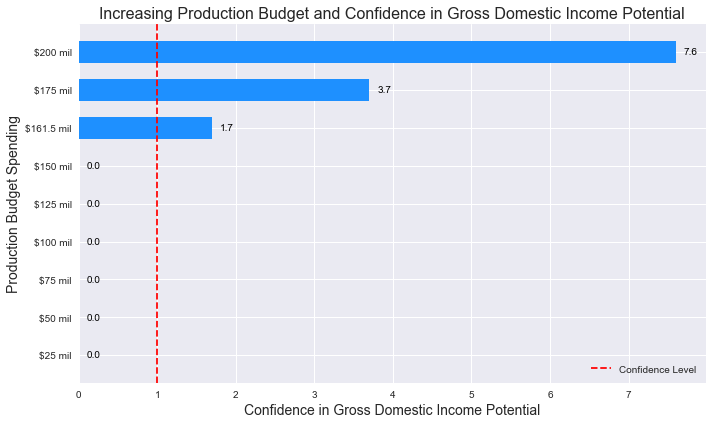

In [42]:
import matplotlib.pyplot as plt

# Data dictionary with budget spending and confidence values
data = {'$25 mil': 0, '$50 mil': 0, '$75 mil': 0, '$100 mil': 0, '$125 mil': 0, '$150 mil': 0, '$161.5 mil': 1.7, '$175 mil': 3.7, '$200 mil': 7.6}
names = list(data.keys())  # List of budget spending labels
values = list(data.values())  # List of confidence values

# Create a figure and axis with custom size and style
plt.figure(figsize=(10, 6))
plt.style.use('seaborn')

# Create a bar plot with custom colors and labels
bars = plt.barh(names, values, color='dodgerblue', height=0.6)

# Add a horizontal line at y = 1.0 with a red dashed line style
plt.axvline(x=1.0, color='r', linestyle='--', label='Confidence Level')

# Customize y-axis labels
plt.xlabel('Confidence in Gross Domestic Income Potential', fontsize=14)
plt.ylabel('Production Budget Spending', fontsize=14)
plt.title('Increasing Production Budget and Confidence in Gross Domestic Income Potential', fontsize=16)

# Annotate the bars with confidence values
for bar, value in zip(bars, values):
    plt.text(value + 0.1, bar.get_y() + bar.get_height() / 2, f'{value:.1f}', va='center', color='black', fontsize=10)

# Remove spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

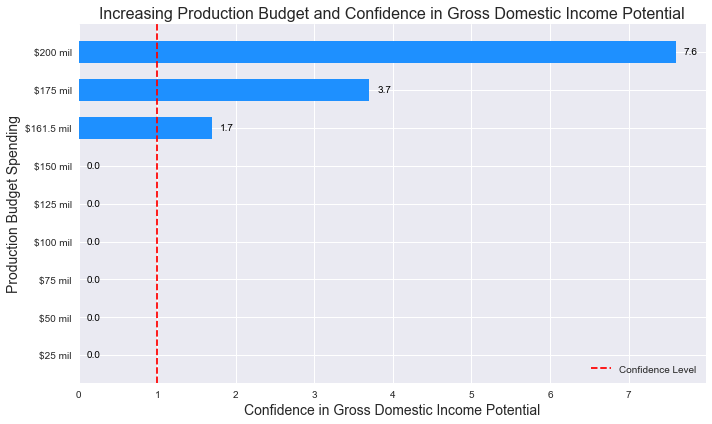

In [43]:
import matplotlib.pyplot as plt

# Set the background color to white
plt.rcParams['figure.facecolor'] = 'white'

# Data dictionary with budget spending and confidence values
data = {'$25 mil': 0, '$50 mil': 0, '$75 mil': 0, '$100 mil': 0, '$125 mil': 0, '$150 mil': 0, '$161.5 mil': 1.7, '$175 mil': 3.7, '$200 mil': 7.6}
names = list(data.keys())  # List of budget spending labels
values = list(data.values())  # List of confidence values

# Create a figure and axis with custom size and style
plt.figure(figsize=(10, 6))
plt.style.use('seaborn')

# Create a bar plot with custom colors and labels
bars = plt.barh(names, values, color='dodgerblue', height=0.6)

# Add a horizontal line at y = 1.0 with a red dashed line style
plt.axvline(x=1.0, color='r', linestyle='--', label='Confidence Level')

# Customize y-axis labels
plt.xlabel('Confidence in Gross Domestic Income Potential', fontsize=14)
plt.ylabel('Production Budget Spending', fontsize=14)
plt.title('Increasing Production Budget and Confidence in Gross Domestic Income Potential', fontsize=16)

# Annotate the bars with confidence values
for bar, value in zip(bars, values):
    plt.text(value + 0.1, bar.get_y() + bar.get_height() / 2, f'{value:.1f}', va='center', color='black', fontsize=10)

# Remove spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

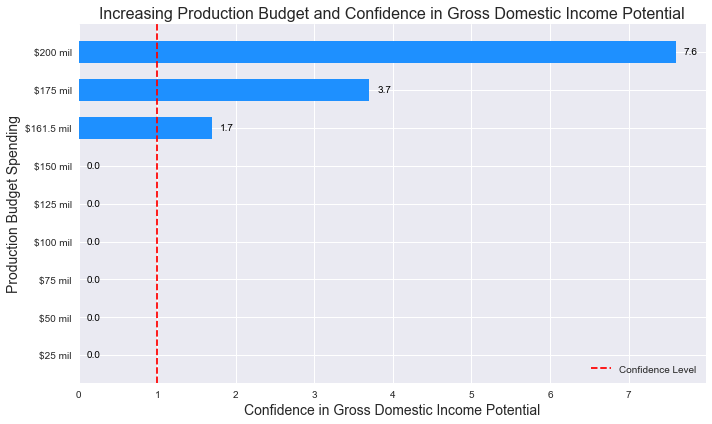

In [44]:
import matplotlib.pyplot as plt

# Data dictionary with budget spending and confidence values
data = {'$25 mil': 0, '$50 mil': 0, '$75 mil': 0, '$100 mil': 0, '$125 mil': 0, '$150 mil': 0, '$161.5 mil': 1.7, '$175 mil': 3.7, '$200 mil': 7.6}
names = list(data.keys())  # List of budget spending labels
values = list(data.values())  # List of confidence values

# Create a figure with white background
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('white')  # Set figure background color

# Create a bar plot with custom colors and labels
bars = ax.barh(names, values, color='dodgerblue', height=0.6)

# Add a horizontal line at y = 1.0 with a red dashed line style
ax.axvline(x=1.0, color='r', linestyle='--', label='Confidence Level')

# Customize y-axis labels
ax.set_xlabel('Confidence in Gross Domestic Income Potential', fontsize=14)
ax.set_ylabel('Production Budget Spending', fontsize=14)
ax.set_title('Increasing Production Budget and Confidence in Gross Domestic Income Potential', fontsize=16)

# Annotate the bars with confidence values
for bar, value in zip(bars, values):
    ax.text(value + 0.1, bar.get_y() + bar.get_height() / 2, f'{value:.1f}', va='center', color='black', fontsize=10)

# Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

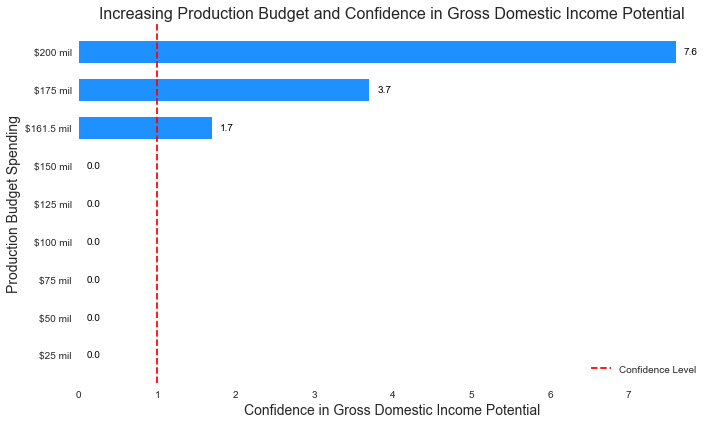

In [45]:
import matplotlib.pyplot as plt

# Data dictionary with budget spending and confidence values
data = {'$25 mil': 0, '$50 mil': 0, '$75 mil': 0, '$100 mil': 0, '$125 mil': 0, '$150 mil': 0, '$161.5 mil': 1.7, '$175 mil': 3.7, '$200 mil': 7.6}
names = list(data.keys())  # List of budget spending labels
values = list(data.values())  # List of confidence values

# Create a figure and axis with custom size and style
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('white')  # Set figure background color

# Set axes background color to white
ax.set_facecolor('white')

# Create a bar plot with custom colors and labels
bars = ax.barh(names, values, color='dodgerblue', height=0.6)

# Add a horizontal line at y = 1.0 with a red dashed line style
ax.axvline(x=1.0, color='r', linestyle='--', label='Confidence Level')

# Customize y-axis labels
ax.set_xlabel('Confidence in Gross Domestic Income Potential', fontsize=14)
ax.set_ylabel('Production Budget Spending', fontsize=14)
ax.set_title('Increasing Production Budget and Confidence in Gross Domestic Income Potential', fontsize=16)

# Annotate the bars with confidence values
for bar, value in zip(bars, values):
    ax.text(value + 0.1, bar.get_y() + bar.get_height() / 2, f'{value:.1f}', va='center', color='black', fontsize=10)

# Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

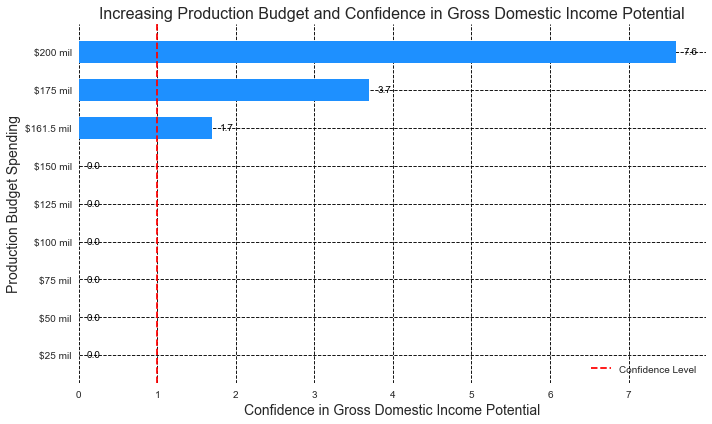

In [47]:
import matplotlib.pyplot as plt

# Data dictionary with budget spending and confidence values
data = {'$25 mil': 0, '$50 mil': 0, '$75 mil': 0, '$100 mil': 0, '$125 mil': 0, '$150 mil': 0, '$161.5 mil': 1.7, '$175 mil': 3.7, '$200 mil': 7.6}
names = list(data.keys())  # List of budget spending labels
values = list(data.values())  # List of confidence values

# Create a figure and axis with custom size and style
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('white')  # Set figure background color

# Set axes background color to white
ax.set_facecolor('white')

# Create a bar plot with custom colors and labels
bars = ax.barh(names, values, color='dodgerblue', height=0.6)

# Add a horizontal line at y = 1.0 with a red dashed line style
ax.axvline(x=1.0, color='r', linestyle='--', label='Confidence Level')

# Customize y-axis labels
ax.set_xlabel('Confidence in Gross Domestic Income Potential', fontsize=14)
ax.set_ylabel('Production Budget Spending', fontsize=14)
ax.set_title('Increasing Production Budget and Confidence in Gross Domestic Income Potential', fontsize=16)

# Annotate the bars with confidence values
for bar, value in zip(bars, values):
    ax.text(value + 0.1, bar.get_y() + bar.get_height() / 2, f'{value:.1f}', va='center', color='black', fontsize=10)

# Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend
ax.legend()

# Add black grid lines
ax.grid(color='black', linestyle='--', linewidth=0.9)

# Show the plot
plt.tight_layout()
plt.show()

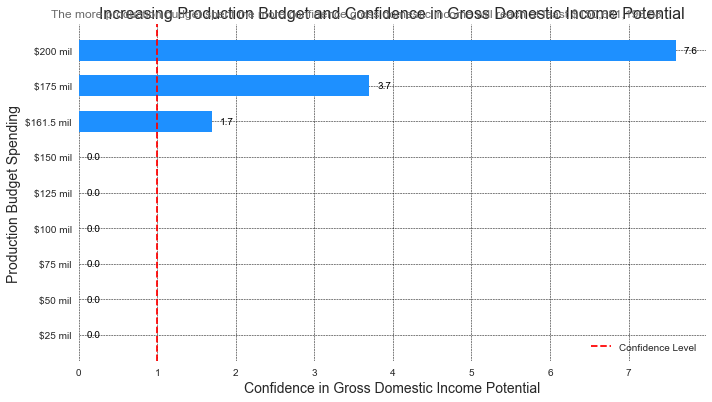

In [48]:
import matplotlib.pyplot as plt

# Data dictionary with budget spending and confidence values
data = {'$25 mil': 0, '$50 mil': 0, '$75 mil': 0, '$100 mil': 0, '$125 mil': 0, '$150 mil': 0, '$161.5 mil': 1.7, '$175 mil': 3.7, '$200 mil': 7.6}
names = list(data.keys())  # List of budget spending labels
values = list(data.values())  # List of confidence values

# Create a figure and axis with custom size and style
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('white')  # Set figure background color

# Set axes background color to white
ax.set_facecolor('white')

# Create a bar plot with custom colors and labels
bars = ax.barh(names, values, color='dodgerblue', height=0.6)

# Add a horizontal line at y = 1.0 with a red dashed line style
ax.axvline(x=1.0, color='r', linestyle='--', label='Confidence Level')

# Customize y-axis labels
ax.set_xlabel('Confidence in Gross Domestic Income Potential', fontsize=14)
ax.set_ylabel('Production Budget Spending', fontsize=14)
ax.set_title('Increasing Production Budget and Confidence in Gross Domestic Income Potential', fontsize=16)

# Annotate the bars with confidence values
for bar, value in zip(bars, values):
    ax.text(value + 0.1, bar.get_y() + bar.get_height() / 2, f'{value:.1f}', va='center', color='black', fontsize=10)

# Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend
ax.legend()

# Add black grid lines
ax.grid(color='black', linestyle='--', linewidth=0.5)

# Add subtitle
subtitle = 'The more production budget spent the more confidence gross domestic income will reach at least $150,681,196.58'
plt.suptitle(subtitle, fontsize=12, y=0.92, color='dimgray')

# Show the plot
plt.tight_layout()
plt.show()

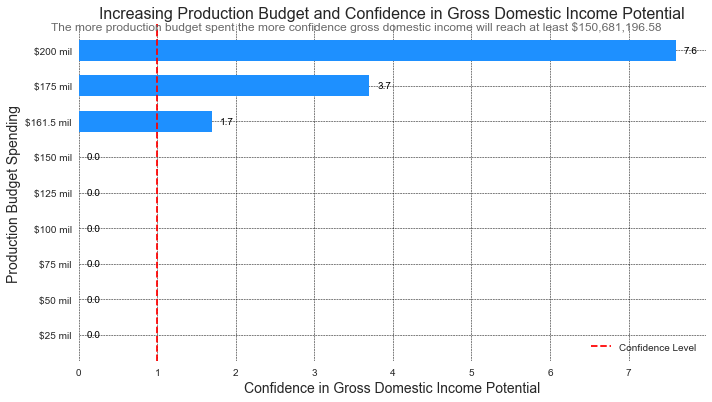

In [52]:
import matplotlib.pyplot as plt

# Data dictionary with budget spending and confidence values
data = {'$25 mil': 0, '$50 mil': 0, '$75 mil': 0, '$100 mil': 0, '$125 mil': 0, '$150 mil': 0, '$161.5 mil': 1.7, '$175 mil': 3.7, '$200 mil': 7.6}
names = list(data.keys())  # List of budget spending labels
values = list(data.values())  # List of confidence values

# Create a figure and axis with custom size and style
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('white')  # Set figure background color

# Set axes background color to white
ax.set_facecolor('white')

# Create a bar plot with custom colors and labels
bars = ax.barh(names, values, color='dodgerblue', height=0.6)

# Add a horizontal line at y = 1.0 with a red dashed line style
ax.axvline(x=1.0, color='r', linestyle='--', label='Confidence Level')

# Customize y-axis labels
ax.set_xlabel('Confidence in Gross Domestic Income Potential', fontsize=14)
ax.set_ylabel('Production Budget Spending', fontsize=14)
ax.set_title('Increasing Production Budget and Confidence in Gross Domestic Income Potential', fontsize=16)

# Annotate the bars with confidence values
for bar, value in zip(bars, values):
    ax.text(value + 0.1, bar.get_y() + bar.get_height() / 2, f'{value:.1f}', va='center', color='black', fontsize=10)

# Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend
ax.legend()

# Add black grid lines
ax.grid(color='black', linestyle='--', linewidth=0.5)

# Add subtitle
subtitle = 'The more production budget spent the more confidence gross domestic income will reach at least $150,681,196.58'
plt.suptitle(subtitle, fontsize=12, y=0.89, color='dimgray')  # Adjust y position to prevent overlap

# Show the plot
plt.tight_layout()
plt.show()







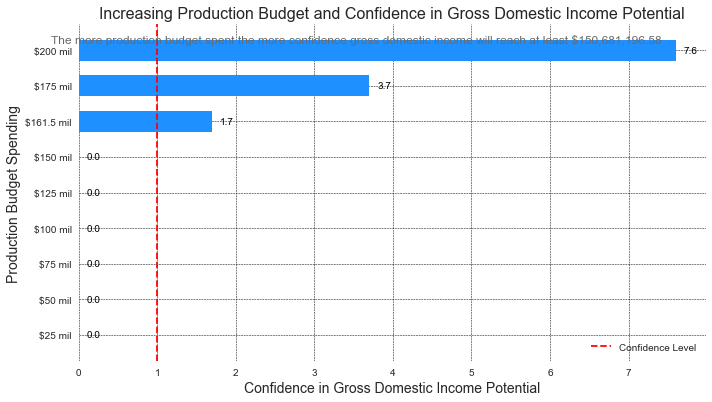

In [54]:
import matplotlib.pyplot as plt

# Data dictionary with budget spending and confidence values
data = {'$25 mil': 0, '$50 mil': 0, '$75 mil': 0, '$100 mil': 0, '$125 mil': 0, '$150 mil': 0, '$161.5 mil': 1.7, '$175 mil': 3.7, '$200 mil': 7.6}
names = list(data.keys())  # List of budget spending labels
values = list(data.values())  # List of confidence values

# Create a figure and axis with custom size and style
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('white')  # Set figure background color

# Set axes background color to white
ax.set_facecolor('white')

# Create a bar plot with custom colors and labels
bars = ax.barh(names, values, color='dodgerblue', height=0.6)

# Add a horizontal line at y = 1.0 with a red dashed line style
ax.axvline(x=1.0, color='r', linestyle='--', label='Confidence Level')

# Customize y-axis labels
ax.set_xlabel('Confidence in Gross Domestic Income Potential', fontsize=14)
ax.set_ylabel('Production Budget Spending', fontsize=14)
ax.set_title('Increasing Production Budget and Confidence in Gross Domestic Income Potential', fontsize=16)

# Annotate the bars with confidence values
for bar, value in zip(bars, values):
    ax.text(value + 0.1, bar.get_y() + bar.get_height() / 2, f'{value:.1f}', va='center', color='black', fontsize=10)

# Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend
ax.legend()

# Add subtitle
subtitle = 'The more production budget spent the more confidence gross domestic income will reach at least $150,681,196.58'
plt.suptitle(subtitle, fontsize=12, y=0.86, color='dimgray')  # Adjust y position for subtitle

# Adjust subplot layout to move the plot a little lower
plt.subplots_adjust(top=0.70)

# Add black grid lines
ax.grid(color='black', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()

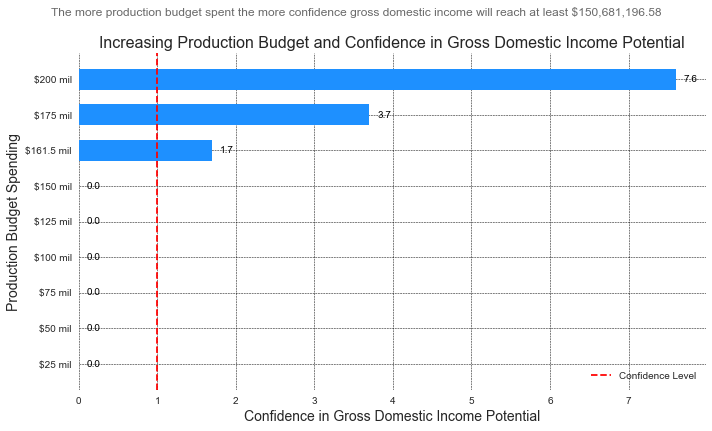

In [56]:
import matplotlib.pyplot as plt

# Data dictionary with budget spending and confidence values
data = {'$25 mil': 0, '$50 mil': 0, '$75 mil': 0, '$100 mil': 0, '$125 mil': 0, '$150 mil': 0, '$161.5 mil': 1.7, '$175 mil': 3.7, '$200 mil': 7.6}
names = list(data.keys())  # List of budget spending labels
values = list(data.values())  # List of confidence values

# Create a figure and axis with custom size and style
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('white')  # Set figure background color

# Set axes background color to white
ax.set_facecolor('white')

# Create a bar plot with custom colors and labels
bars = ax.barh(names, values, color='dodgerblue', height=0.6)

# Add a horizontal line at y = 1.0 with a red dashed line style
ax.axvline(x=1.0, color='r', linestyle='--', label='Confidence Level')

# Customize y-axis labels
ax.set_xlabel('Confidence in Gross Domestic Income Potential', fontsize=14)
ax.set_ylabel('Production Budget Spending', fontsize=14)
ax.set_title('Increasing Production Budget and Confidence in Gross Domestic Income Potential', fontsize=16)

# Annotate the bars with confidence values
for bar, value in zip(bars, values):
    ax.text(value + 0.1, bar.get_y() + bar.get_height() / 2, f'{value:.1f}', va='center', color='black', fontsize=10)

# Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend
ax.legend()

# Add subtitle
subtitle = 'The more production budget spent the more confidence gross domestic income will reach at least $150,681,196.58'
plt.suptitle(subtitle, fontsize=12, y=0.99, color='dimgray')  # Adjust y position for subtitle

# Adjust subplot layout to provide space for the subtitle
plt.subplots_adjust(top=0.82)

# Add black grid lines
ax.grid(color='black', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()

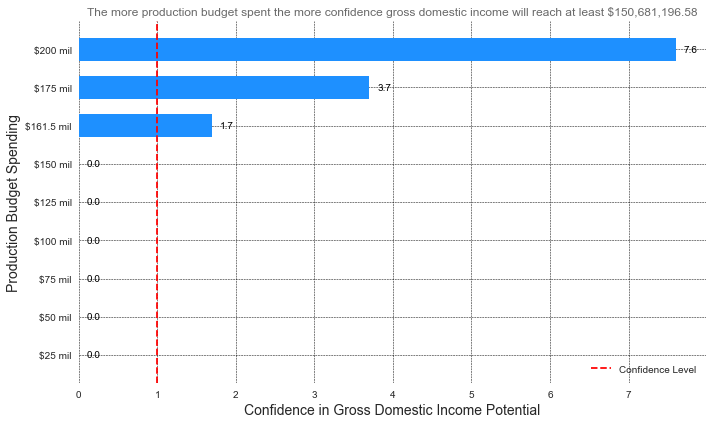

In [58]:
import matplotlib.pyplot as plt

# Data dictionary with budget spending and confidence values
data = {'$25 mil': 0, '$50 mil': 0, '$75 mil': 0, '$100 mil': 0, '$125 mil': 0, '$150 mil': 0, '$161.5 mil': 1.7, '$175 mil': 3.7, '$200 mil': 7.6}
names = list(data.keys())  # List of budget spending labels
values = list(data.values())  # List of confidence values

# Create a figure and axis with custom size and style
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('white')  # Set figure background color

# Set axes background color to white
ax.set_facecolor('white')

# Create a bar plot with custom colors and labels
bars = ax.barh(names, values, color='dodgerblue', height=0.6)

# Add a horizontal line at y = 1.0 with a red dashed line style
ax.axvline(x=1.0, color='r', linestyle='--', label='Confidence Level')

# Customize y-axis labels
ax.set_xlabel('Confidence in Gross Domestic Income Potential', fontsize=14)
ax.set_ylabel('Production Budget Spending', fontsize=14)
ax.set_title('Increasing Production Budget and Confidence in Gross Domestic Income Potential', fontsize=16, y=0.99)  # Adjust title position

# Annotate the bars with confidence values
for bar, value in zip(bars, values):
    ax.text(value + 0.1, bar.get_y() + bar.get_height() / 2, f'{value:.1f}', va='center', color='black', fontsize=10)

# Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend
ax.legend()

# Add subtitle at the original title position
subtitle = 'The more production budget spent the more confidence gross domestic income will reach at least $150,681,196.58'
plt.title(subtitle, fontsize=12, color='dimgray')  # Use plt.title to set the subtitle

# Adjust subplot layout to provide space for the title and subtitle
plt.subplots_adjust(top=0.86)

# Add black grid lines
ax.grid(color='black', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()



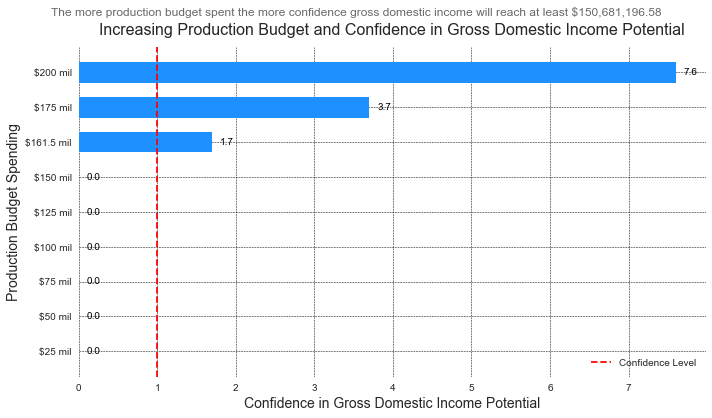

In [59]:
import matplotlib.pyplot as plt

# Data dictionary with budget spending and confidence values
data = {'$25 mil': 0, '$50 mil': 0, '$75 mil': 0, '$100 mil': 0, '$125 mil': 0, '$150 mil': 0, '$161.5 mil': 1.7, '$175 mil': 3.7, '$200 mil': 7.6}
names = list(data.keys())  # List of budget spending labels
values = list(data.values())  # List of confidence values

# Create a figure and axis with custom size and style
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('white')  # Set figure background color

# Set axes background color to white
ax.set_facecolor('white')

# Create a bar plot with custom colors and labels
bars = ax.barh(names, values, color='dodgerblue', height=0.6)

# Add a horizontal line at y = 1.0 with a red dashed line style
ax.axvline(x=1.0, color='r', linestyle='--', label='Confidence Level')

# Customize y-axis labels
ax.set_xlabel('Confidence in Gross Domestic Income Potential', fontsize=14)
ax.set_ylabel('Production Budget Spending', fontsize=14)

# Add title and subtitle
title = 'Increasing Production Budget and Confidence in Gross Domestic Income Potential'
subtitle = 'The more production budget spent the more confidence gross domestic income will reach at least $150,681,196.58'
plt.title(title, fontsize=16, y=1.02)  # Title above subtitle
plt.suptitle(subtitle, fontsize=12, color='dimgray', y=0.96)  # Adjust y position for subtitle

# Annotate the bars with confidence values
for bar, value in zip(bars, values):
    ax.text(value + 0.1, bar.get_y() + bar.get_height() / 2, f'{value:.1f}', va='center', color='black', fontsize=10)

# Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend
ax.legend()

# Add black grid lines
ax.grid(color='black', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()

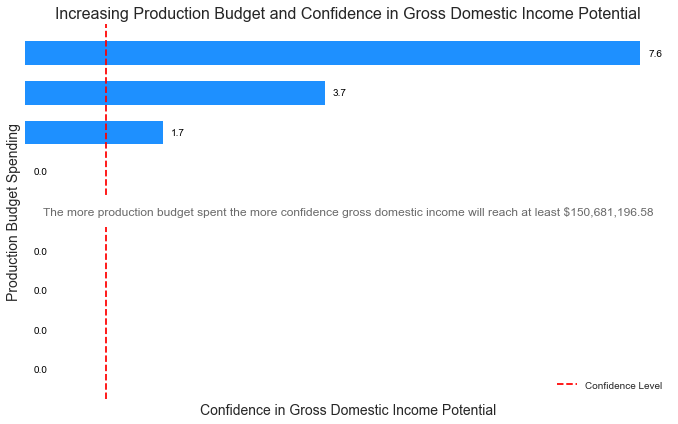

In [60]:
import matplotlib.pyplot as plt

# Data dictionary with budget spending and confidence values
data = {'$25 mil': 0, '$50 mil': 0, '$75 mil': 0, '$100 mil': 0, '$125 mil': 0, '$150 mil': 0, '$161.5 mil': 1.7, '$175 mil': 3.7, '$200 mil': 7.6}
names = list(data.keys())  # List of budget spending labels
values = list(data.values())  # List of confidence values

# Create a figure and axis with custom size and style
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('white')  # Set figure background color

# Set axes background color to white
ax.set_facecolor('white')

# Create a bar plot with custom colors and labels
bars = ax.barh(names, values, color='dodgerblue', height=0.6)

# Add a horizontal line at y = 1.0 with a red dashed line style
ax.axvline(x=1.0, color='r', linestyle='--', label='Confidence Level')

# Customize y-axis labels
ax.set_xlabel('Confidence in Gross Domestic Income Potential', fontsize=14)
ax.set_ylabel('Production Budget Spending', fontsize=14)

# Add title
title = 'Increasing Production Budget and Confidence in Gross Domestic Income Potential'
plt.title(title, fontsize=16)

# Annotate the bars with confidence values
for bar, value in zip(bars, values):
    ax.text(value + 0.1, bar.get_y() + bar.get_height() / 2, f'{value:.1f}', va='center', color='black', fontsize=10)

# Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend
ax.legend()

# Add black grid lines
ax.grid(color='black', linestyle='--', linewidth=0.5)

# Add text box for subtitle
subtitle = 'The more production budget spent the more confidence gross domestic income will reach at least $150,681,196.58'
text_box = ax.text(0.5, 0.5, subtitle, transform=ax.transAxes, fontsize=12, color='dimgray', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='none', pad=10))

# Hide x and y ticks
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.tight_layout()
plt.show()

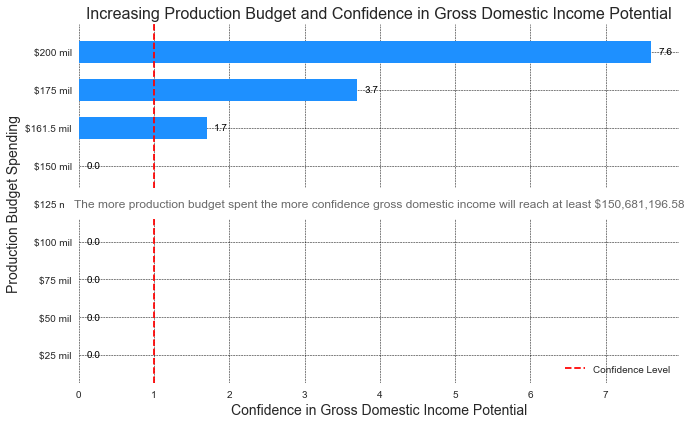

In [62]:
import matplotlib.pyplot as plt

# Data dictionary with budget spending and confidence values
data = {'$25 mil': 0, '$50 mil': 0, '$75 mil': 0, '$100 mil': 0, '$125 mil': 0, '$150 mil': 0, '$161.5 mil': 1.7, '$175 mil': 3.7, '$200 mil': 7.6}
names = list(data.keys())  # List of budget spending labels
values = list(data.values())  # List of confidence values

# Create a figure and axis with custom size and style
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('white')  # Set figure background color

# Set axes background color to white
ax.set_facecolor('white')

# Create a bar plot with custom colors and labels
bars = ax.barh(names, values, color='dodgerblue', height=0.6)

# Add a horizontal line at y = 1.0 with a red dashed line style
ax.axvline(x=1.0, color='r', linestyle='--', label='Confidence Level')

# Customize y-axis labels
ax.set_xlabel('Confidence in Gross Domestic Income Potential', fontsize=14)
ax.set_ylabel('Production Budget Spending', fontsize=14)

# Add title
title = 'Increasing Production Budget and Confidence in Gross Domestic Income Potential'
plt.title(title, fontsize=16)

# Annotate the bars with confidence values
for bar, value in zip(bars, values):
    ax.text(value + 0.1, bar.get_y() + bar.get_height() / 2, f'{value:.1f}', va='center', color='black', fontsize=10)

# Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend
ax.legend()

# Add black grid lines
ax.grid(color='black', linestyle='--', linewidth=0.5)

# Add text box for subtitle
subtitle = 'The more production budget spent the more confidence gross domestic income will reach at least $150,681,196.58'
text_box = ax.text(0.5, 0.5, subtitle, transform=ax.transAxes, fontsize=12, color='dimgray', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='none', pad=10))

# Show the plot
plt.tight_layout()
plt.show()








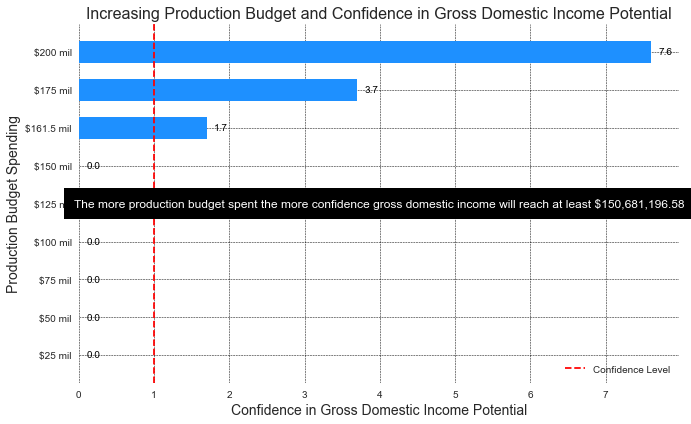

In [63]:
import matplotlib.pyplot as plt

# Data dictionary with budget spending and confidence values
data = {'$25 mil': 0, '$50 mil': 0, '$75 mil': 0, '$100 mil': 0, '$125 mil': 0, '$150 mil': 0, '$161.5 mil': 1.7, '$175 mil': 3.7, '$200 mil': 7.6}
names = list(data.keys())  # List of budget spending labels
values = list(data.values())  # List of confidence values

# Create a figure and axis with custom size and style
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('white')  # Set figure background color

# Set axes background color to white
ax.set_facecolor('white')

# Create a bar plot with custom colors and labels
bars = ax.barh(names, values, color='dodgerblue', height=0.6)

# Add a horizontal line at y = 1.0 with a red dashed line style
ax.axvline(x=1.0, color='r', linestyle='--', label='Confidence Level')

# Customize y-axis labels
ax.set_xlabel('Confidence in Gross Domestic Income Potential', fontsize=14)
ax.set_ylabel('Production Budget Spending', fontsize=14)

# Add title
title = 'Increasing Production Budget and Confidence in Gross Domestic Income Potential'
plt.title(title, fontsize=16)

# Annotate the bars with confidence values
for bar, value in zip(bars, values):
    ax.text(value + 0.1, bar.get_y() + bar.get_height() / 2, f'{value:.1f}', va='center', color='black', fontsize=10)

# Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend
ax.legend()

# Add black grid lines
ax.grid(color='black', linestyle='--', linewidth=0.5)

# Add text box for subtitle with black background
subtitle = 'The more production budget spent the more confidence gross domestic income will reach at least $150,681,196.58'
text_box = ax.text(0.5, 0.5, subtitle, transform=ax.transAxes, fontsize=12, color='white', ha='center', va='center', bbox=dict(facecolor='black', edgecolor='none', pad=10))

# Show the plot
plt.tight_layout()
plt.show()

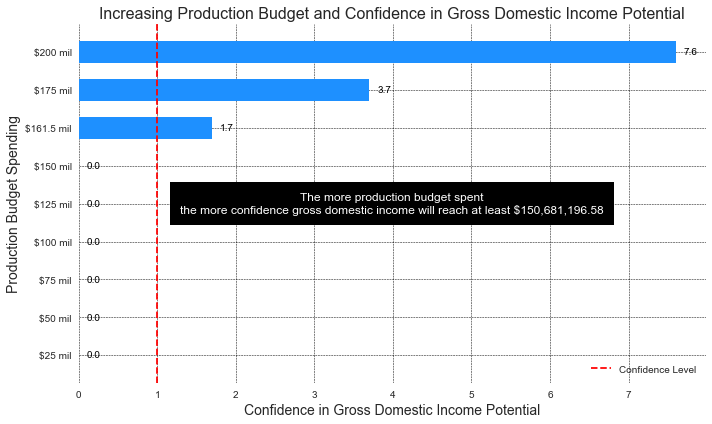

In [64]:
import matplotlib.pyplot as plt

# Data dictionary with budget spending and confidence values
data = {'$25 mil': 0, '$50 mil': 0, '$75 mil': 0, '$100 mil': 0, '$125 mil': 0, '$150 mil': 0, '$161.5 mil': 1.7, '$175 mil': 3.7, '$200 mil': 7.6}
names = list(data.keys())  # List of budget spending labels
values = list(data.values())  # List of confidence values

# Create a figure and axis with custom size and style
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('white')  # Set figure background color

# Set axes background color to white
ax.set_facecolor('white')

# Create a bar plot with custom colors and labels
bars = ax.barh(names, values, color='dodgerblue', height=0.6)

# Add a horizontal line at y = 1.0 with a red dashed line style
ax.axvline(x=1.0, color='r', linestyle='--', label='Confidence Level')

# Customize y-axis labels
ax.set_xlabel('Confidence in Gross Domestic Income Potential', fontsize=14)
ax.set_ylabel('Production Budget Spending', fontsize=14)

# Add title
title = 'Increasing Production Budget and Confidence in Gross Domestic Income Potential'
plt.title(title, fontsize=16)

# Annotate the bars with confidence values
for bar, value in zip(bars, values):
    ax.text(value + 0.1, bar.get_y() + bar.get_height() / 2, f'{value:.1f}', va='center', color='black', fontsize=10)

# Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend
ax.legend()

# Add black grid lines
ax.grid(color='black', linestyle='--', linewidth=0.5)

# Add text box for subtitle with black background (two lines)
subtitle = 'The more production budget spent\nthe more confidence gross domestic income will reach at least $150,681,196.58'
text_box = ax.text(0.5, 0.5, subtitle, transform=ax.transAxes, fontsize=12, color='white', ha='center', va='center', bbox=dict(facecolor='black', edgecolor='none', pad=10))

# Show the plot
plt.tight_layout()
plt.show()

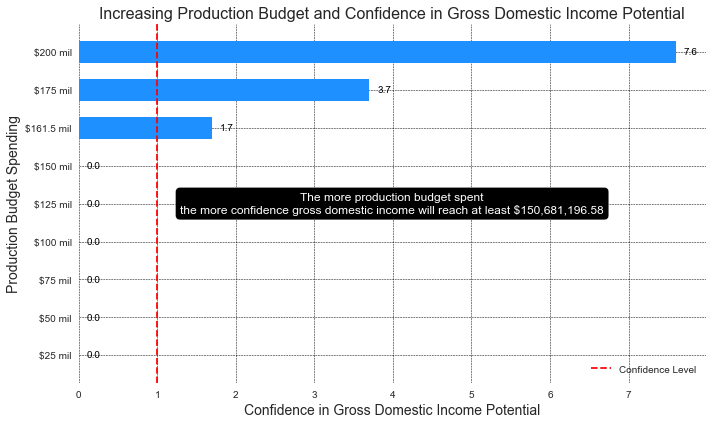

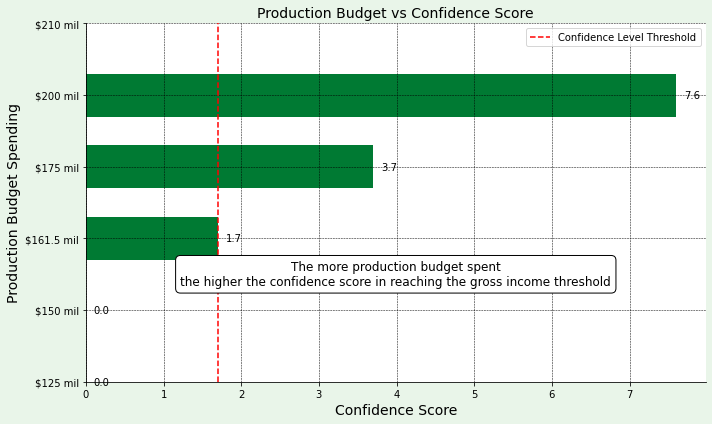

In [7]:
import matplotlib.pyplot as plt

# Data dictionary with budget spending and confidence values
data = {'$125 mil': 0, '$150 mil': 0, '$161.5 mil': 1.7, '$175 mil': 3.7, '$200 mil': 7.6}
names = list(data.keys())  # List of budget spending labels
values = list(data.values())  # List of confidence values

# Create a figure and axis with custom size and style
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('#e9f5e9')  # Set figure background color to Deloitte green

# Set axes background color to white
ax.set_facecolor('white')

# Create a bar plot with custom colors and labels
bars = ax.barh(names, values, color='#007a33', height=0.6)  # Deloitte green color

# Add a horizontal line at y = 1.0 with a red dashed line style
ax.axvline(x=1.7, color='r', linestyle='--', label='Confidence Level Threshold')

# Customize y-axis labels
ax.set_xlabel('Confidence Score', fontsize=14)
ax.set_ylabel('Production Budget Spending', fontsize=14)

# Set y-axis limits to display up to $210 million
ax.set_ylim('$125 mil', '$210 mil')

# Add title
title = 'Production Budget vs Confidence Score'
plt.title(title, fontsize=14)  # Smaller title font size

# Annotate the bars with confidence values
for bar, value in zip(bars, values):
    ax.text(value + 0.1, bar.get_y() + bar.get_height() / 2, f'{value:.1f}', va='center', color='black', fontsize=10)

# Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend
ax.legend()

# Add black grid lines
ax.grid(color='black', linestyle='--', linewidth=0.5)

# Add text box for subtitle with white background (two lines)
subtitle = 'The more production budget spent\nthe higher the confidence score in reaching the gross income threshold'
text_box = ax.text(0.5, 0.3, subtitle, transform=ax.transAxes, fontsize=12, color='black', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='none', pad=10))

# Style the text box further
text_box.set_bbox(dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))

# Save the plot as an image file (e.g., PNG format)
output_filename = 'deloitte_green_graph.png'
plt.tight_layout()
plt.savefig(output_filename)

# Show the plot
plt.show()

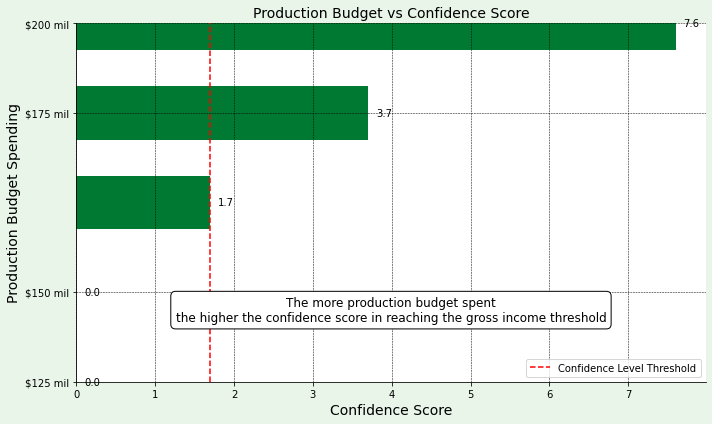

In [9]:
import matplotlib.pyplot as plt

# Data dictionary with budget spending and confidence values
data = {'$125 mil': 0, '$150 mil': 0, '$161.5 mil': 1.7, '$175 mil': 3.7, '$200 mil': 7.6}
names = list(data.keys())  # List of budget spending labels
values = list(data.values())  # List of confidence values

# Create a figure and axis with custom size and style
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('#e9f5e9')  # Set figure background color to Deloitte green

# Set axes background color to white
ax.set_facecolor('white')

# Create a bar plot with custom colors and labels
bars = ax.barh(names, values, color='#007a33', height=0.6)  # Deloitte green color

# Add a horizontal line at y = 1.0 with a red dashed line style
ax.axvline(x=1.7, color='r', linestyle='--', label='Confidence Level Threshold')

# Customize y-axis labels
ax.set_xlabel('Confidence Score', fontsize=14)
ax.set_ylabel('Production Budget Spending', fontsize=14)

# Set y-axis limits and tick intervals
ax.set_ylim('$125 mil', '$200 mil')
ax.set_yticks(['$125 mil', '$150 mil', '$175 mil', '$200 mil'])

# Add title
title = 'Production Budget vs Confidence Score'
plt.title(title, fontsize=14)  # Smaller title font size

# Annotate the bars with confidence values
for bar, value in zip(bars, values):
    ax.text(value + 0.1, bar.get_y() + bar.get_height() / 2, f'{value:.1f}', va='center', color='black', fontsize=10)

# Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend
ax.legend()

# Add black grid lines
ax.grid(color='black', linestyle='--', linewidth=0.5)

# Add text box for subtitle with white background (two lines)
subtitle = 'The more production budget spent\nthe higher the confidence score in reaching the gross income threshold'
text_box = ax.text(0.5, 0.2, subtitle, transform=ax.transAxes, fontsize=12, color='black', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='none', pad=10))

# Style the text box further
text_box.set_bbox(dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))

# Save the plot as an image file (e.g., PNG format)
output_filename = 'deloitte_green_graph.png'
plt.tight_layout()
plt.savefig(output_filename)

# Show the plot
plt.show()